## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combineData = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
combineData.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# first, use .unique to pull out the unique data
'''regimenMice = combineData["Mouse ID"].unique()
regimenDrugs = combineData["Drug Regimen"].unique()
regimenTime = combineData["Timepoint"].unique()
#find the length of each regimen
regMouse = len(regimenMice)
regDrugs = len(regimenDrugs)
regTime = len(regimenTime)
regSample = regDrugs * regTime
#creat a dataframe to summarize the data in columns and rows
dataSummary = pd.DataFrame({"Quantity of Mice": [regMouse],
                         "Quantity of Drug Regimen Treatments": [regDrugs],
                         "Time Measurements": [regTime],
                         "Samples": [regSample]})
dataSummary
'''
#make a list of all unique drug regimen names
# Capomulin
# Ceftamin
#Infubinol
#Ketapril
#Placebo
#Naftisol
#Propriva
#Ramicane
#Stelasyn
#Zoniferol
combineData[combineData['Drug Regimen']=="Ramicane"]["Tumor Volume (mm3)"].tolist()

[45.0,
 38.82589807,
 35.01427146,
 34.22399174,
 32.99772858,
 33.46457735,
 31.09949753,
 26.54699343,
 24.36550471,
 22.05012627,
 45.0,
 45.85153062,
 40.17055848,
 40.67812852,
 41.211897,
 35.56939935,
 34.95258284,
 30.96039194,
 31.36940573,
 29.12847181,
 45.0,
 38.71187185,
 34.850997899999996,
 35.27690634,
 35.92865083,
 36.33856894,
 35.47402235,
 35.8461407,
 32.79817119,
 30.27623175,
 45.0,
 42.99887638,
 43.74822357,
 39.89743533,
 36.71229535,
 37.44444543,
 37.96993365,
 38.62753581,
 35.114575200000004,
 30.56462509,
 45.0,
 42.18878662,
 42.95211843,
 38.68851607,
 36.89001635,
 37.41411419,
 37.81593487,
 38.50482444,
 34.02209336,
 30.63869575,
 45.0,
 44.01490022,
 44.49716216,
 45.25253427,
 42.16834132,
 37.86066936,
 34.75724046,
 35.17014843,
 31.00186078,
 31.56046955,
 45.0,
 45.52187471,
 40.3751382,
 36.94027399,
 37.4788685,
 33.20500824,
 33.817758000000005,
 34.48752204,
 34.95473311,
 31.09533505,
 45.0,
 45.5786783,
 46.28799223,
 46.94094512,
 43.1

In [4]:
#Create df for each mean, median, varience, stdev & SEM and calculate
meanGen = pd.DataFrame(round(combineData.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2))
meanGen = meanGen.rename(columns={"Tumor Volume (mm3)":"Mean"})
#----------------------------------------------------------------------
medianGen = pd.DataFrame(round(combineData.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2))
medianGen = medianGen.rename(columns={"Tumor Volume (mm3)":"Median"})
#----------------------------------------------------------------------
varGen = pd.DataFrame(round(combineData.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2))
varGen = varGen.rename(columns={"Tumor Volume (mm3)":"Variance"})
#----------------------------------------------------------------------
stDev = pd.DataFrame(round(combineData.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2))
stDev = stDev.rename(columns={"Tumor Volume (mm3)":"StDev"})
#----------------------------------------------------------------------
semGen = pd.DataFrame(round(combineData.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2))
senGen = semGen.rename(columns={"Tumor Volume (mm3)":"SEM"})
#----------------------------------------------------------------------
statSum = [meanGen, medianGen, varGen, stDev, semGen]
statSum = pd.concat(statSum,axis=1,join='inner')
statSum



,Mean,Median,Variance,StDev,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

Text(0, 0.5, 'Tumor Volume (mm3)')

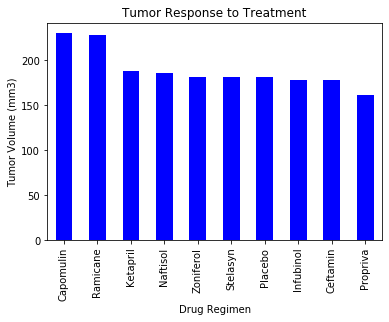

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatmentReg = combineData["Drug Regimen"].value_counts()
barGraph = treatmentReg.plot(kind="bar", facecolor="blue")

plt.title('Tumor Response to Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

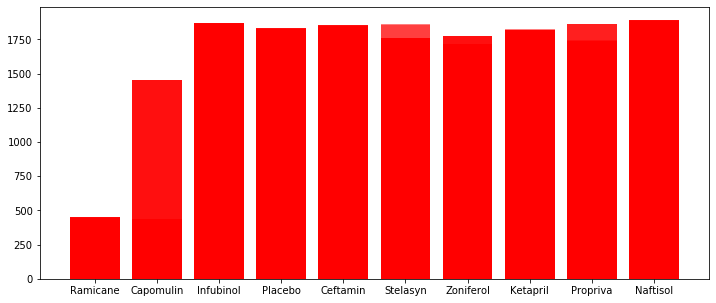

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
xAxis = np.arange(len(combineData))
tickLocations = [value for value in xAxis]

plt.figure(figsize=(12,5))
plt.bar(combineData["Drug Regimen"], xAxis, color='r', alpha=0.5, align="center")
plt.show()

## Pie plots

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
miceGender = pd.DataFrame(combineData["Sex"].value_counts())
miceGender

,Sex
Male,958
Female,935


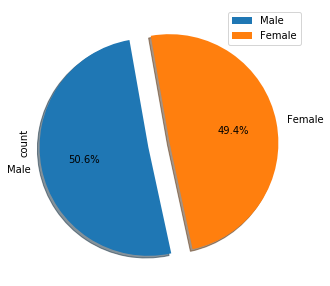

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
genderDataframe = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
explode = (0.2,0)
genderPie = genderDataframe.plot.pie(y='count', explode=explode, figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=100)


## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#calculate tumor vol first on paper/in english. then calculate it in the form of a code

ramicaneReg = combineData[combineData['Drug Regimen']=="Ramicane"]
ramicaneReg

capomulinReg = combineData[combineData['Drug Regimen']=="Capomulin"]
capomulinReg

KetaprilReg = combineData[combineData['Drug Regimen']=="Ketapril"]
KetaprilReg

NaftisolReg = combineData[combineData['Drug Regimen']=="Naftisol"]
NaftisolReg.head(30)
NaftisolReg.sort_values(by='Timepoint', ascending=True)

groupData = NaftisolReg.groupby('Mouse ID')
groupData.last()

NaftisolReg['Tumor Volume (mm3)']

# if i do a groupby on combine data that will find the max value of 
# colums for each drug trial which is represented by a different mouse id



558     45.000000
559     45.696709
560     49.790919
561     51.227566
562     54.834624
          ...    
1888    63.145652
1889    65.841013
1890    69.176246
1891    70.314904
1892    73.867845
Name: Tumor Volume (mm3), Length: 186, dtype: float64

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#once you know what you don't know, google it.

## Line and scatter plots

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
averageTotal = []
weightTotal = []

regimenDrugs = combineData["Mouse ID"].unique().tolist()
print(regimenDrugs)

for x in combineData:
    averageTotal.append(np.mean(capomulinReg[capomulinReg["Mouse ID"] == x]['Tumor Volume (mm3)'].tolist()))
    weightTotal.append(np.mean(capomulinReg[capomulinReg["Mouse ID"] == x]['Weight (g)'].tolist()))

"""print(averageTotal)
print(weightTotal)
print(combineData)
capomulinReg"""
capomulinReg[capomulinReg["Mouse ID"] == "Ramicane"]['Tumor Volume (mm3)'].tolist()

['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546', 'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758', 't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811', 'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128', 'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678', 'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457', 'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497', 'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531', 'i386', 'i477', 'i635', 'i669', 'i901', 'j235', 'j296', 'j365', 'j755', 'j984', 'k210', 'k382', 'k483',

[]

## Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen